<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/main/EDA_Ruou_Do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân loại chất lượng rượu đỏ

##**1.Định nghĩa vấn đề**
+ **Mô tả**:
   + Bộ dữ liệu gồm 1599 mẫu từ các loại rượu
   + 11 đặc điểm được đo từ mỗi mẫu + 1 biến phân loại (thang điểm 8)
+ **Dữ liệu vào**:
   + Fixed acidity (Độ axit cố định): Là các loại axit không bay hơi (không dễ bay hơi). Độ axit này được xác định bởi tổng lượng axit có trong mẫu. Axit cố định gồm các axit hữu cơ có độ bay hơi thấp như axit malic, lactic, tartaric hoặc citric — những thành phần đặc trưng cho mẫu rượu.
   + Volatile acidity (Độ axit bay hơi): Là lượng axit axetic có trong rượu; nếu quá cao sẽ gây mùi vị khó chịu như giấm. Axit bay hơi gồm các axit hữu cơ mạch ngắn có thể tách ra khỏi mẫu bằng quá trình chưng cất như axit fomic, axit axetic, axit propionic và axit butyric.
   + Citric acid (Axit citric): Có trong rượu với lượng nhỏ, giúp tạo vị “tươi mát” và hương vị dễ chịu. Đây là một axit hữu cơ yếu, không màu, có tự nhiên trong các loại trái cây họ cam quýt. Trong sinh hóa, nó là chất trung gian trong chu trình axit citric (chu trình Krebs) diễn ra trong quá trình trao đổi chất của sinh vật hiếu khí.
   + Residual sugar (Lượng đường dư): Là lượng đường còn lại sau khi quá trình lên men dừng lại. Thông thường rượu hiếm khi có dưới 1 g/l đường. Lượng đường dư ảnh hưởng đến độ ngọt của rượu và được đo bằng gam đường trên mỗi lít (g/l). Ở EU, lượng đường dư còn được quy định để gắn nhãn phân loại rượu.
   + Chlorides (Lượng muối) Là lượng ion chloride (Cl⁻) có trong rượu. Rượu đỏ thường có lượng chloride cao hơn do quá trình chiết xuất từ vỏ nho trong quá trình lên men. Nước ép nho đỏ không nên vượt quá 356 mg/L ion chloride, để rượu thành phẩm không vượt quá mức pháp lý tối đa 606 mg/L.
   + Free sulfur dioxide (SO₂ tự do): Là dạng SO₂ tồn tại tự do trong dung dịch (dưới dạng khí hòa tan hoặc ion bisulfite). SO₂ tự do có khả năng phản ứng, mang tính kháng khuẩn và chống oxy hóa. Ngược lại, SO₂ liên kết là phần đã phản ứng với các phân tử khác trong rượu. Tổng hai phần này tạo nên tổng lượng SO₂.
   + Total sulfur dioxide (Tổng SO₂): Là tổng lượng SO₂ tự do và SO₂ liên kết. Ở nồng độ thấp, SO₂ hầu như không được cảm nhận trong rượu, nhưng nếu cao có thể gây mùi khó chịu. Đây là chỉ tiêu quan trọng để kiểm soát chất lượng và độ bền của rượu.
   + Density (Mật độ): Mật độ của rượu gần bằng nước, phụ thuộc vào hàm lượng cồn và đường. Dụng cụ đo mật độ là hydrometer — một ống thủy tinh có đầu nặng, dùng để đo tỉ trọng của rượu so với nước (gọi là “specific gravity”).
   + pH: Cho biết độ axit hoặc độ kiềm của rượu trên thang 0–14 (0: rất axit, 14: rất kiềm). Phần lớn rượu có pH từ 3 đến 4. Rượu có pH cao (>3,65) dễ bị hư hỏng do vi sinh vật. Vì vậy, người làm rượu thường bổ sung SO₂ (dưới dạng kali metabisulfite) để ổn định rượu trong quá trình ủ và bảo quản.
   + Sulphates (Sunphat): Là phụ gia có thể góp phần hình thành khí SO₂, giúp diệt khuẩn và bảo quản rượu. Sulphate tự nhiên có sẵn ở mức thấp trong tất cả các loại rượu do quá trình lên men, nhưng cũng thường được bổ sung thêm. Một số người nhạy cảm với sulphite có thể bị đau đầu hoặc nghẹt mũi sau khi uống rượu có nồng độ cao.
   + Alcohol (Nồng độ cồn): Là tỷ lệ phần trăm (%) cồn ethanol trong rượu — yếu tố chính ảnh hưởng đến hương vị, độ nặng và cảm giác khi uống.
+ **Dữ liệu ra**:
   + Thang điểm 3 - 8 của từng loại rượu
+ **Mục tiêu**:
   + Phân tích và đánh giá chất lượng của từng loại rượu.


## **2.Chuẩn bị vấn đề**

### **2.1.Khai báo thư viện**

In [30]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


### **2.2.Nạp dữ liệu**

In [31]:
#load data
redwine = pd.read_csv('winequality-red1.csv')

## **3.Mô tả thống kê**

#### **3.1. Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [32]:
# Get shape
print(f'+ Shape: {redwine.shape}')

# Get types
print(f'\n+ Data Types:\n{redwine.dtypes}')

# Check the first 5 rows (head)
print('\n+ First 5 rows:')
display(redwine.head(5))

# Check the last 5 rows (tail)
print('\n+ Last 5 rows:')
display(redwine.tail(5))

# info
print('\n + Basic Information: ')
redwine.info()

+ Shape: (1599, 12)

+ Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

+ First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



+ Last 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6



 + Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Thông tin cơ bản của bộ dữ liêu**

*   Dữ liệu có 11 tính chất để phân lớp: fixed acidity,volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, ph, sulphates, alcohol.
*   Các giá trị đều là số học thuộc kiểu float64 và int64
*   Tổng số dòng dữ liệu là 1599
*   Dữ liệu phân lớp nằm ở cột quality gồm 6 giá trị, thang điểm từ 3 đến 8




#### **3.2. Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [33]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Dựa vào biểu đồ box plot và bảng thống kê mô tả của bộ dữ liệu ta thấy**

*   Giá trị trung bình của fixed acidity là 8.31, giá trị cao nhất là 15.9, giá trị thấp nhất là 4.6
*   Giá trị trung bình của volatile acidity là 0.52, giá trị cao nhất là 1.58, giá trị thấp nhất là 0.12
*   Giá trị trung bình của citric acid là 0.27, giá trị cao nhất là 1.0, giá trị thấp nhất là 0
*   Giá trị trung bình của residual sugar là 2.53, giá trị cao nhất là 15.5, giá trị thấp nhất là 0.9
*   Giá trị trung bình của chlorides là 0.08, giá trị cao nhất là 0.61, giá trị thấp nhất là 0.01
*   Giá trị trung bình của free sulfur dioxide là 15.87, giá trị cao nhất là 72, giá trị thấp nhất là 1
*   Giá trị trung bình của total sulfur dioxide là 46.46, giá trị cao nhất là 289, giá trị thấp nhất là 6
*   Giá trị trung bình của density là 0.996, giá trị cao nhất là 1, giá trị thấp nhất là 0.990
*   Giá trị trung bình của pH	 là 3.31, giá trị cao nhất là 4.01, giá trị thấp nhất là 2.74
*   Giá trị trung bình của sulphates là 0.65, giá trị cao nhất là 2, giá trị thấp nhất là 0.33
*   Giá trị trung bình của alcohol là 10.4, giá trị cao nhất là 14.9, giá trị thấp nhất là 8.4
*   Giá trị trung bình của quality là 5.63, giá trị cao nhất là 8, giá trị thấp nhất là 3

#### **3.3. Kiểm tra tính toàn vẹn của dữ liệu**

Kiểm tra dữ liệu bị thiếu

In [34]:
print("Số dữ liệu bị thiếu: {} ".format(redwine.isnull().sum().sum()))

Số dữ liệu bị thiếu: 0 


Kiểm tra dữ liệu bị trùng

In [35]:
print("Số dữ liệu bị trùng: {} ".format(redwine.duplicated().sum()))

Số dữ liệu bị trùng: 240 


Xử lí dữ liệu bị trùng lặp

In [36]:
print("Trước khi xử lí dữ liệu:", redwine.shape)
redwine.drop_duplicates(inplace=True)
print("Sau khi xử lí dữ liệu:", redwine.shape)

Trước khi xử lí dữ liệu: (1599, 12)
Sau khi xử lí dữ liệu: (1359, 12)


## **4.EDA và trực quan hóa dữ liệu**

### **4.1.Phân tích đơn biến (Univariable Analysis)**

+ **Câu hỏi 1:** Chất lượng rượu trong tập dữ liệu được phân bổ như thế nào? Tỷ lệ giữa rượu có chất lượng cao, trung bình và thấp là bao nhiêu?

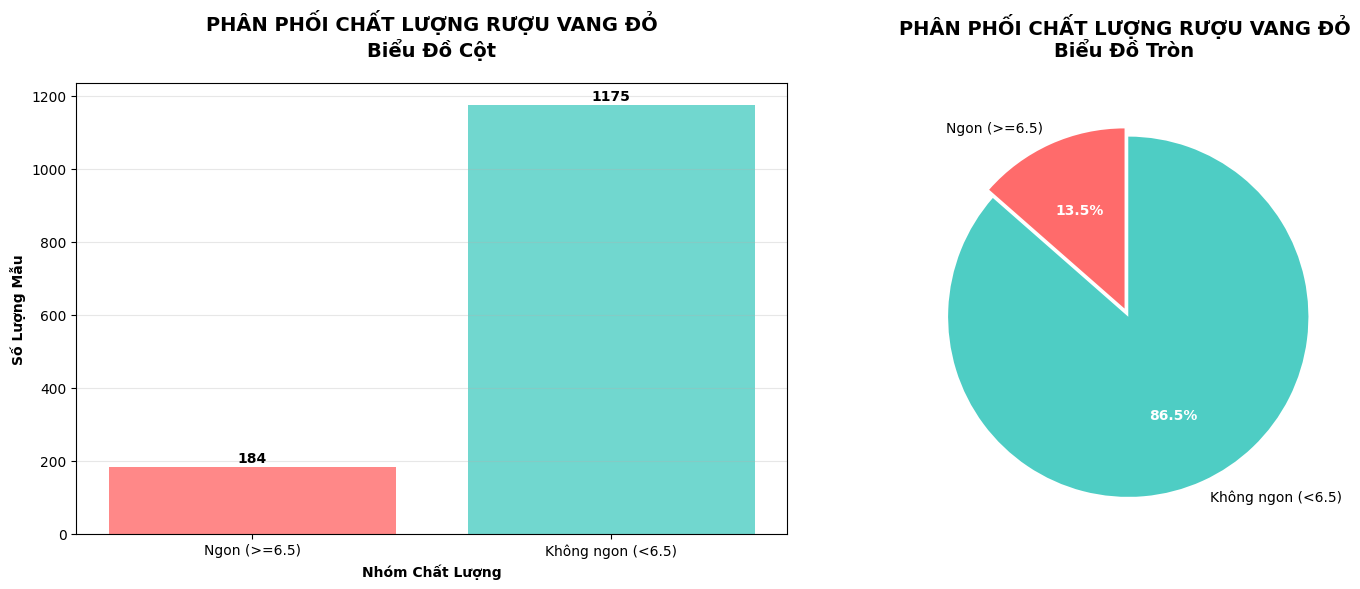

In [37]:
# 1. Phân loại chất lượng rượu
def classify_quality(score):
    if score >= 6.5:
        return 'Ngon (>=6.5)'
    else:
        return 'Không ngon (<6.5)'

redwine['quality_category'] = redwine['quality'].apply(classify_quality)
quality_counts = redwine['quality_category'].value_counts()

# Đảm bảo thứ tự các nhóm khi vẽ biểu đồ
category_order = ['Ngon (>=6.5)', 'Không ngon (<6.5)']
quality_counts = quality_counts.reindex(category_order)

# 2. Tạo hình vẽ với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- BAR CHART ---
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
bars = ax1.bar(quality_counts.index, quality_counts.values, color=colors, alpha=0.8)
ax1.set_title('PHÂN PHỐI CHẤT LƯỢNG RƯỢU VANG ĐỎ\nBiểu Đồ Cột', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Nhóm Chất Lượng', fontweight='bold')
ax1.set_ylabel('Số Lượng Mẫu', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Thêm số liệu lên trên mỗi cột
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

# --- PIE CHART ---
wedges, texts, autotexts = ax2.pie(quality_counts.values,
                                   labels=quality_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   explode=(0, 0.05))  # Tách nhãn Poor và Good ra một chút

ax2.set_title('PHÂN PHỐI CHẤT LƯỢNG RƯỢU VANG ĐỎ\nBiểu Đồ Tròn', fontsize=14, fontweight='bold', pad=20)

# Làm đẹp cho phần trăm trong pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

 **Nhận xét:** Chất lượng rượu phân bổ không đồng đều, với đa số (86.5%) ở mức không ngon, tỷ lệ rượu ngon là 13.5%. Điều này phản ánh thực tế là phần lớn rượu vang đỏ trên thị trường có chất lượng kém không ngon, trong khi rượu chất lượng cao thực sự khá hiếm và rất ít.

---

+ **Câu hỏi 2:** Vậy dựa trên tiêu chí nào để xác định yếu tố ảnh hưởng đến chất lượng của rượu?

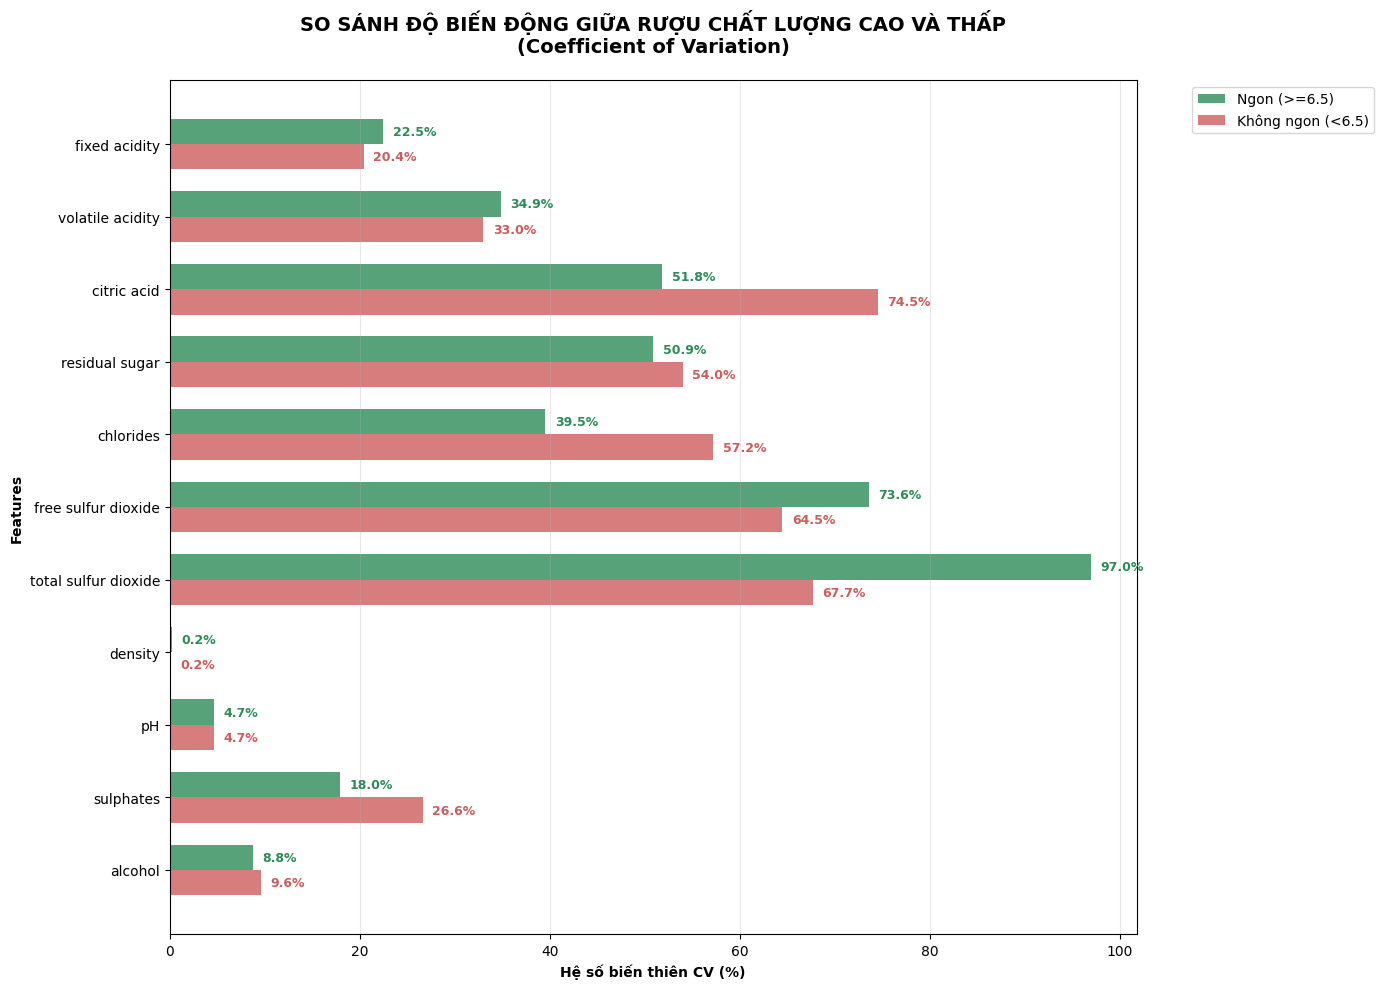

In [38]:
# Tính CV cho từng nhóm chất lượng
cv_comparison = []

for column in redwine.select_dtypes(include=[np.number]).columns:
    if column not in ['quality', 'quality_category']:
        # Tính CV cho nhóm chất lượng cao
        high_quality_data = redwine[redwine['quality_category'] == 'Ngon (>=6.5)'][column]
        cv_high = (high_quality_data.std() / high_quality_data.mean()) * 100

        # Tính CV cho nhóm chất lượng thấp
        low_quality_data = redwine[redwine['quality_category'] == 'Không ngon (<6.5)'][column]
        cv_low = (low_quality_data.std() / low_quality_data.mean()) * 100

        cv_comparison.append({
            'feature': column,
            'cv_high_quality': cv_high,
            'cv_low_quality': cv_low,
            'cv_difference': cv_high - cv_low  # Chênh lệch giữa 2 nhóm
        })

# Chuyển thành DataFrame
cv_comparison_df = pd.DataFrame(cv_comparison)

# BIỂU ĐỒ SO SÁNH CV GIỮA 2 NHÓM CHẤT LƯỢNG
plt.figure(figsize=(14, 10))

# Tạo dữ liệu cho biểu đồ
features = cv_comparison_df['feature']
cv_high = cv_comparison_df['cv_high_quality']
cv_low = cv_comparison_df['cv_low_quality']

x = np.arange(len(features))
width = 0.35

# Vẽ biểu đồ cột
bars1 = plt.barh(x - width/2, cv_high, width, label='Ngon (>=6.5)',
                 color='#2E8B57', alpha=0.8)
bars2 = plt.barh(x + width/2, cv_low, width, label='Không ngon (<6.5)',
                 color='#CD5C5C', alpha=0.8)

# Thêm giá trị CV
for i, (h_val, l_val) in enumerate(zip(cv_high, cv_low)):
    plt.text(h_val + 1, i - width/2, f'{h_val:.1f}%', va='center', fontsize=9, fontweight='bold', color='#2E8B57')
    plt.text(l_val + 1, i + width/2, f'{l_val:.1f}%', va='center', fontsize=9, fontweight='bold', color='#CD5C5C')

plt.ylabel('Features', fontweight='bold')
plt.xlabel('Hệ số biến thiên CV (%)', fontweight='bold')
plt.title('SO SÁNH ĐỘ BIẾN ĐỘNG GIỮA RƯỢU CHẤT LƯỢNG CAO VÀ THẤP\n(Coefficient of Variation)',
          fontweight='bold', pad=20, fontsize=14)
plt.yticks(x, features)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm đường grid
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  # Đảo ngược trục y để feature đầu tiên ở trên cùng
plt.tight_layout()

plt.savefig('CV_Comparison_by_Quality.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Nhận xét:** Phân tích hệ số biến thiên (CV) theo nhóm chất lượng cho thấy sự khác biệt rõ rệt trong độ ổn định của các chỉ tiêu:
  + Ở nhóm rượu không ngon, các yếu tố citric acid (CV = 74.5%), chlorides (57.2%), và residual sugar (54.0%) có biến động đặc biệt cao hơn nhóm rượu ngon, điều này phản ánh sự thiếu kiểm soát trong quy trình sản xuất.
  + Trong khi đó, free sulfur dioxide (73.6%) và total sulfur dioxide (67.7%) có CV cao ở cả hai nhóm, cho thấy đây là những biến vốn dĩ khó kiểm soát.
  + Ngược lại, các chỉ số alcohol, sulphates, pH và density có độ biến động thấp (CV < 30%) ở cả hai nhóm, chứng tỏ được kiểm soát chặt chẽ.
-> Do đó, ưu tiên lựa chọn các chỉ tiêu có (CV > 40%) vì chúng là những ứng viên tiềm năng nhất cho phân tích nguyên nhân ảnh hưởng đến chất lượng rượu.

---

+ **Câu hỏi 3:** Phân bố thực tế của các yếu tố có biến động cao (CV > 40%) như thế nào, và có xuất hiện các giá trị ngoại lai (outliers) đáng chú ý không?

Dựa trên đồ biểu đồ phân tích hệ số biến thiên trên, ta chọn được 5 features có CV cao (>40%) để tiếp tục tìm hiểu sự phân bố của chúng:
  + total sulfur dioxide (71.3%)
  + free sulfur dioxide (65.7%)
  + chlorides (56.0%)
  + residual sugar (53.6%)
  + citric acid (71.8%)

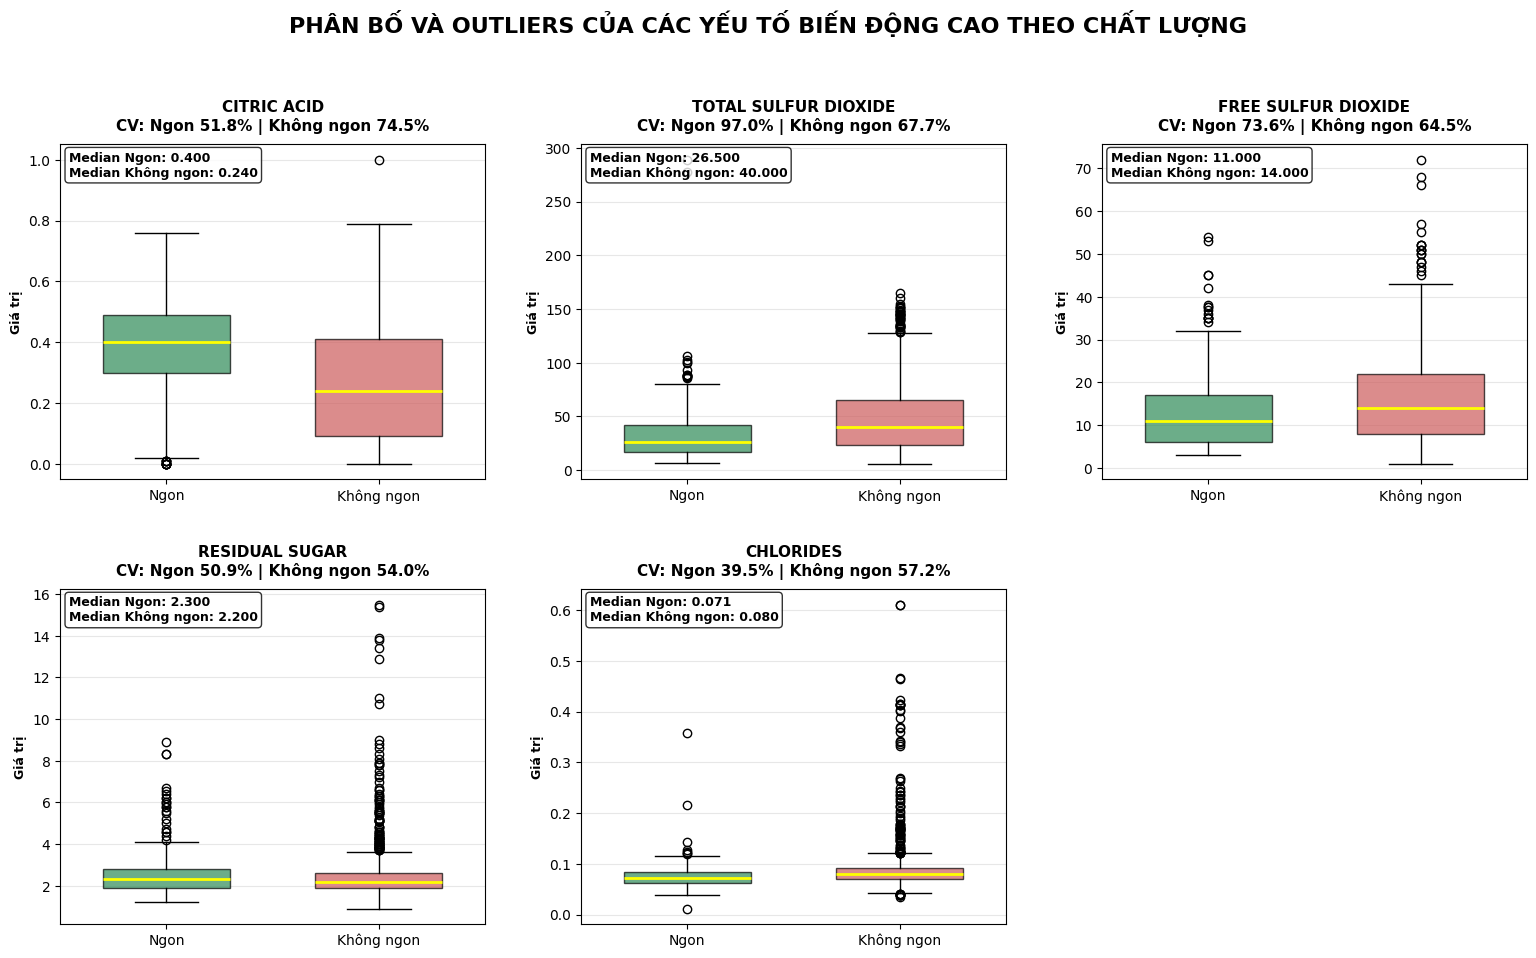

In [39]:
# Tính lại CV cho toàn bộ dataset để có cv_df
cv_analysis = []
for column in redwine.select_dtypes(include=[np.number]).columns:
    if column != 'quality' and column != 'quality_category':
        mean_val = redwine[column].mean()
        std_val = redwine[column].std()
        cv = (std_val / mean_val) * 100
        cv_analysis.append({
            'feature': column,
            'mean': mean_val,
            'std': std_val,
            'cv': cv
        })

cv_df = pd.DataFrame(cv_analysis).sort_values('cv', ascending=False)

# Chọn top 5 features có CV cao nhất
high_cv_features = ['citric acid', 'total sulfur dioxide', 'free sulfur dioxide',
                    'residual sugar', 'chlorides']

# Tạo subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(high_cv_features):
    # Tạo boxplot SO SÁNH giữa 2 nhóm chất lượng
    data_to_plot = [
        redwine[redwine['quality_category'] == 'Ngon (>=6.5)'][feature],
        redwine[redwine['quality_category'] == 'Không ngon (<6.5)'][feature]
    ]

    # Vẽ box plot
    box_plot = axes[i].boxplot(data_to_plot,
                              labels=['Ngon', 'Không ngon'],
                              patch_artist=True,
                              widths=0.6)

    # Tô màu cho box
    colors = ['#2E8B57', '#CD5C5C']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Đặt màu cho median line
    for median in box_plot['medians']:
        median.set_color('yellow')
        median.set_linewidth(2)

    # Lấy CV values từ phân tích so sánh
    cv_high = cv_comparison_df[cv_comparison_df['feature'] == feature]['cv_high_quality'].values[0]
    cv_low = cv_comparison_df[cv_comparison_df['feature'] == feature]['cv_low_quality'].values[0]

    # Title với thông tin CV
    axes[i].set_title(f'{feature.upper()}\nCV: Ngon {cv_high:.1f}% | Không ngon {cv_low:.1f}%',
                     fontweight='bold', fontsize=11, pad=10)
    axes[i].set_ylabel('Giá trị', fontweight='bold', fontsize=9)
    axes[i].grid(axis='y', alpha=0.3)

    # Thêm thống kê quan trọng
    median_high = data_to_plot[0].median()
    median_low = data_to_plot[1].median()

    # Hiển thị median values
    axes[i].text(0.02, 0.98, f'Median Ngon: {median_high:.3f}\nMedian Không ngon: {median_low:.3f}',
                transform=axes[i].transAxes,
                ha='left', va='top', fontweight='bold', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Ẩn subplot thừa
for i in range(len(high_cv_features), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('PHÂN BỐ VÀ OUTLIERS CỦA CÁC YẾU TỐ BIẾN ĐỘNG CAO THEO CHẤT LƯỢNG',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(pad=3.0)
plt.savefig('CV_Comparison_by_Quality_BoxPlot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Nhận xét:**
  + citric acid (Axit Citric): Nhóm rượu ngon có median cao hơn (0.400 vs 0.240). Hàm lượng axit citric đủ cao là yếu tố quan trọng cho rượu chất lượng tốt. Cả hai nhóm đều có outliers, nhưng nhóm không ngon có biến động lớn hơn (CV 74.5%)
  + residual sugar (Đường tồn dư): Median gần như tương đương (2.300 vs 2.200). Cả 2 nhóm đều lệch phải mạnh với nhiều outliers ở giá trị cao. Đường tồn dư không phải là yếu tố phân biệt chính chất lượng
  + total sulfur dioxide (SO₂ tổng): Nhóm không ngon có median cao hơn (40.000 vs 26.500). Nhóm ngon có CV rất cao (97.0%) với nhiều outliers. SO₂ tổng cao có thể là dấu hiệu của chất lượng kém
  + free sulfur dioxide (SO₂ tự do): Tương tự với SO₂ tổng, nhóm không ngon có median CAO HƠN (14.000 vs 11.000). Cả hai nhóm đều có outliers ở giá trị cao
  + chlorides (Muối): Nhóm không ngon có median CAO HƠN (0.080 vs 0.071). Nhóm không ngon biến động mạnh hơn (CV 57.2% vs 39.5%). Hàm lượng muối cao liên quan đến chất lượng thấp

**Ý nghĩa rút ra về mối quan hệ Chất lượng - Thành phần:**
  + Yếu tố tích cực: Citric acid cao → chất lượng tốt
  + Yếu tố tiêu cực:  SO₂ (tổng & tự do) cao, Chlorides cao → chất lượng kém
  + Yếu tố trung tính: Residual sugar không ảnh hưởng rõ đến chất lượng

---

+ **Câu hỏi 4:** Vậy outliers phân bố không đều giữa các features như thế nào? Features nào NHIỀU outliers nhất? Features nào ÍT outliers nhất?
      



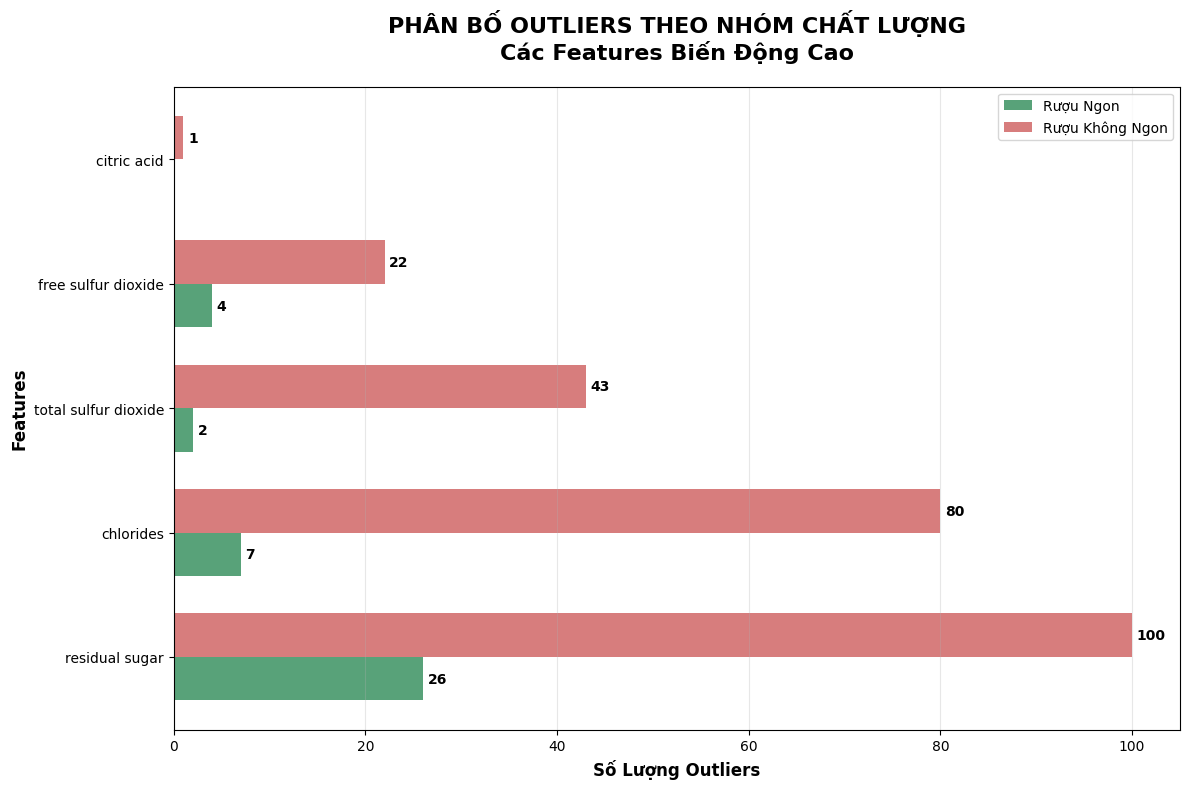

In [40]:
# PHÂN TÍCH OUTLIERS CHI TIẾT THEO NHÓM CHẤT LƯỢNG
outlier_analysis = []

for feature in high_cv_features:
    # Tính toán IQR
    Q1 = redwine[feature].quantile(0.25)
    Q3 = redwine[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Đếm outliers
    outliers_mask = (redwine[feature] < lower_bound) | (redwine[feature] > upper_bound)

    # Đếm outliers theo nhóm chất lượng
    outliers_high = redwine[outliers_mask & (redwine['quality_category'] == 'Ngon (>=6.5)')]
    outliers_low = redwine[outliers_mask & (redwine['quality_category'] == 'Không ngon (<6.5)')]

    total_outliers = len(outliers_high) + len(outliers_low)
    outlier_percentage = (total_outliers / len(redwine)) * 100

    outlier_analysis.append({
        'feature': feature,
        'outliers_high_quality': len(outliers_high),
        'outliers_low_quality': len(outliers_low),
        'total_outliers': total_outliers,
        'outlier_percentage': outlier_percentage
    })

# Sắp xếp theo tổng số outliers
outlier_df = pd.DataFrame(outlier_analysis).sort_values('total_outliers', ascending=False)

# BIỂU ĐỒ SO SÁNH OUTLIERS THEO NHÓM CHẤT LƯỢNG
plt.figure(figsize=(12, 8))

# Tạo dữ liệu cho biểu đồ
features = outlier_df['feature']
outliers_high = outlier_df['outliers_high_quality']
outliers_low = outlier_df['outliers_low_quality']

y = np.arange(len(features))
width = 0.35

# Vẽ biểu đồ cột nhóm theo chiều ngang
bars1 = plt.barh(y - width/2, outliers_high, width, label='Rượu Ngon',
                color='#2E8B57', alpha=0.8)
bars2 = plt.barh(y + width/2, outliers_low, width, label='Rượu Không Ngon',
                color='#CD5C5C', alpha=0.8)

# Tùy chỉnh biểu đồ
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.xlabel('Số Lượng Outliers', fontweight='bold', fontsize=12)
plt.title('PHÂN BỐ OUTLIERS THEO NHÓM CHẤT LƯỢNG\nCác Features Biến Động Cao',
          fontsize=16, fontweight='bold', pad=20)
plt.yticks(y, features)
plt.legend()

# Thêm số liệu lên các cột
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if outliers_high.iloc[i] > 0:
        plt.text(bar1.get_width() + 0.5, bar1.get_y() + bar1.get_height()/2,
                 f'{outliers_high.iloc[i]}', ha='left', va='center',
                 fontweight='bold', fontsize=10)
    if outliers_low.iloc[i] > 0:
        plt.text(bar2.get_width() + 0.5, bar2.get_y() + bar2.get_height()/2,
                 f'{outliers_low.iloc[i]}', ha='left', va='center',
                 fontweight='bold', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Outliers_by_Quality_BarChart.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

**Nhận xét:** Residual Sugar và Chlorides là hai features có số outliers cao nhất, cho thấy sự xuất hiện của những mẫu rượu có đặc tính cực kỳ khác biệt về độ ngọt và vị mặn so với đa số còn lại. Trong khi đó, Citric Acid có số outliers thấp nhất trong nhóm, dù có CV cao nhất.

→ Điều này cho thấy CV cao không nhất thiết đồng nghĩa với nhiều outliers. Citric Acid có độ biến động cao nhưng phân bố tương đối đồng đều, trong khi Residual Sugar và Chlorides có cả độ biến động cao và tập trung nhiều giá trị cực đoan.

---

### **4.2.Phân tích đa biến (Multivariable Analysis)**

+ **Câu hỏi 1:** Các thuộc tính ảnh hưởng như thế nào đến điểm chất lượng (quality) của rượu?
  + Thuộc tính nào GIÚP NÂNG chất lượng?
  + Thuộc tính nào LÀM GIẢM chất lượng?
  + Thuộc tính nào KHÔNG ẢNH HƯỞNG đến chất lượng?

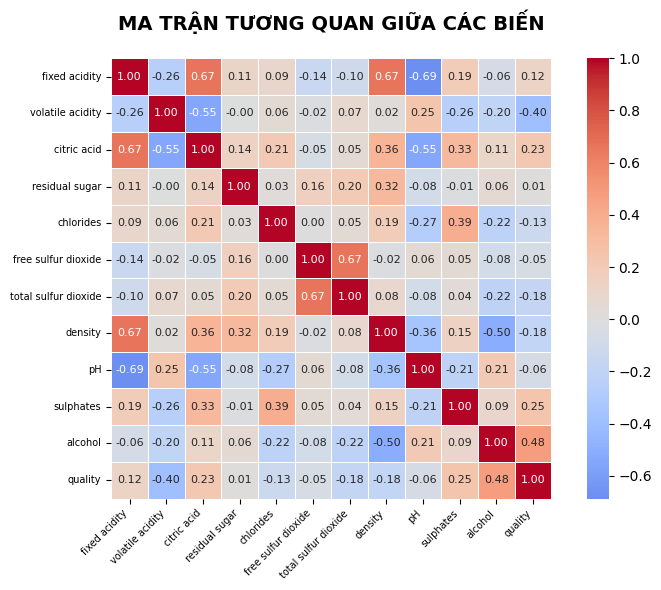

In [41]:
# PHÂN TÍCH ĐA BIẾN - Câu hỏi 1
# Biến hóa học nào có ảnh hưởng LỚN NHẤT và NHỎ NHẤT đến điểm chất lượng (quality) của rượu?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tính ma trận tương quan
correlation_matrix = redwine.corr(numeric_only=True)

# 2. Tạo heatmap TOÀN BỘ ma trận (bỏ mask)
plt.figure(figsize=(8, 6))  # Thu nhỏ kích thước tổng thể

sns.heatmap(correlation_matrix,
            annot=True,         # Hiển thị số trên ô
            fmt=".2f",          # Định dạng số: 2 chữ số thập phân
            cmap='coolwarm',    # Bản đồ màu: xanh (âm) - trắng - đỏ (dương)
            center=0,           # Tâm của màu ở giá trị 0
            square=True,
            linewidths=0.5,
            annot_kws={"size": 8})  # Thu nhỏ cỡ chữ trong ô để dễ đọc

plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=7)  # Thu nhỏ cỡ chữ trục X
plt.yticks(rotation=0, fontsize=7)               # Thu nhỏ cỡ chữ trục Y
plt.tight_layout()
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


**Nhận xét các thuộc tính có mối quan hệ với chất lượng (quanlity):**
  + Alcohol(Nồng độ cồn) có mối tương quan mạnh với quality (+0.48), cho thấy hàm lượng cồn ảnh hưởng khá lớn đến chất lượng của rượu. Rượu có hàm lượng cồn cao thường có chất lượng tốt hơn.
  + Volatile acidity(độ axit dễ bay hơi) có tương quan âm khá cao với quality (-0.39), cho thấy nếu volatile acidity tăng, có thể làm giảm chất lượng của rượu, vì sự biến đổi nhanh chóng của axit dễ làm rượu bị chua, có mùi giấm.
  + Residual sugar(lượng đường dư) gần như không có mối quan hệ nào với quanlity (0.01), dù rằng một chút đường dư có thể cải thiện cảm giác ngọt ngào trong rượu. Tuy nhiên, mối tương quan gần như không có, cho thấy rằng mức độ đường dư không phải yếu tố quyết định trong việc đánh giá chất lượng của rượu.

**Ngoài ra,nhận thấy các thuộc tính có độ tương quan cao sau:**
  + Fixed acidity, citric acid và pH(> 0.54)
  + Total sulfur dioxide và free sulfur dioxide(+0.67)
  + Density và alcohol (-0.50), density và fixed acidity (+0.67)
  + citric acid và volatile acidity (-0.55)


---

**-> Phân tích mức độ tương quan của nhóm Axit (fixed acidity, citric acid và pH)**
  + fixed acidity và quality (+0.12)
  + citric acid và quality (+0.23)
  + pH và quanlity (-0.06)

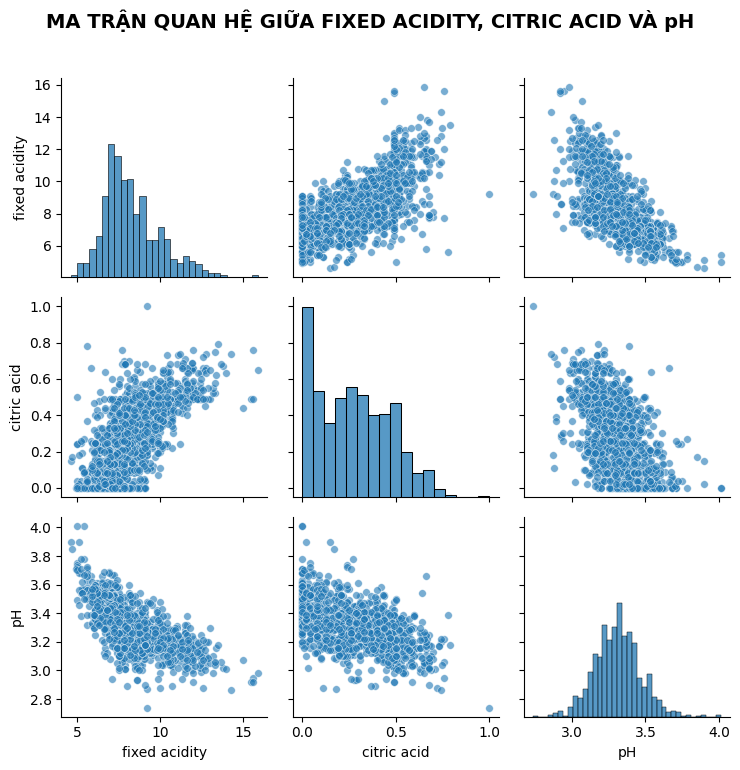

In [42]:
# Tạo pair plot cho 3 biến
sns.pairplot(redwine[['fixed acidity', 'citric acid', 'pH']],
             diag_kind='hist',  # Dùng histogram trên đường chéo
             plot_kws={'alpha': 0.6, 's': 30})  # Điều chỉnh độ trong suốt và kích thước điểm

plt.suptitle('MA TRẬN QUAN HỆ GIỮA FIXED ACIDITY, CITRIC ACID VÀ pH',
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Nhận xét chung:** Biểu đồ cho thấy một vòng tròn logic: Fixed Acidity và Citric Acid cùng tăng giảm với nhau (dương tính). Cả hai cùng 'kéo' giá trị pH đi xuống (âm tính). Điều này khẳng định chúng là một nhóm gắn bó chặt chẽ, cùng mô tả đặc tính về độ chua của rượu."

**Điểm khác biệt:** citric acid có tương quan dương nhẹ (+0.23) với chất lượng, trong khi fixed acidity gần như không có tương quan (+0.12). Vì thế mà đối với chất lượng, *loại axit* quan trọng hơn *tổng lượng axit*. Một chai rượu tốt không cần phải có độ axit cố định (fixed acidity) thật cao, mà cần có sự cân bằng phù hợp, trong đó axit citric (citric acid) là axit "tốt" mang lại vị tươi sáng - đóng vai trò then chốt.


---

**-> Phân tích mối quan hệ giữa Mật độ (Density) với các thành phần chính của rượu**
  + Density và quanlity (-0.17)
  + Alcohol và quanlity (0.48)
  + Fixed acidity và quanlity (-0.12)

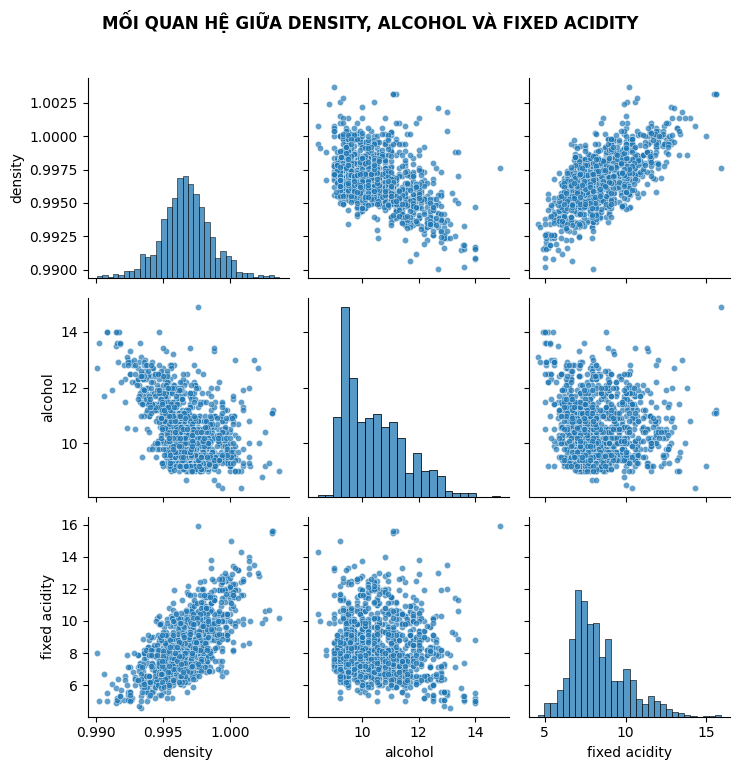

In [43]:
# Tạo pairplot với kích thước nhỏ hơn và tối ưu cho việc quan sát
sns.pairplot(redwine[['density', 'alcohol', 'fixed acidity']],
             diag_kind='hist',
             plot_kws={'alpha': 0.7, 's': 20},
             height=2.5,
             aspect=1)

plt.suptitle('MỐI QUAN HỆ GIỮA DENSITY, ALCOHOL VÀ FIXED ACIDITY',
             y=1.02, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Nhận xét chung:** Biểu đồ cho thấy mật độ (density) của rượu bị kéo giữa hai thứ: cồn (alcohol) và axit (fixed acidity). Cồn càng nhiều thì rượu càng nhẹ (density giảm), ngược lại, axit càng nhiều thì rượu càng nặng (density tăng). Density không phải là thứ quyết định chất lượng, mà nó là kết quả của việc cồn và axit trong chai rượu đó nhiều hay ít.

**Điểm khác biệt:** Mặc dù cùng ảnh hưởng đến density, nhưng chỉ có cồn (alcohol) mới thực sự làm rượu ngon hơn. Axit (fixed acidity) gần như không giúp cải thiện chất lượng. Vì vậy, một chai rượu có density thấp thường là một chai rượu ngon. Lý do rất đơn giản: density thấp đồng nghĩa với việc cồn trong chai đó cao - và cồn cao chính là dấu hiệu quan trọng nhất của rượu chất lượng.

---

**-> Phân tích mức độ tương quan của nhóm Lưu huỳnh đioxit (Sulfur Dioxide)**
  + total sulfur dioxide và quanlity (-0.19)
  + free sulfur dioxide và quanlity (-0.05)

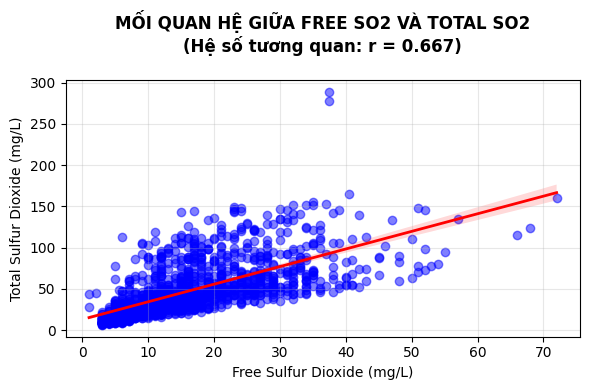

In [44]:
# Vẽ scatter plot chi tiết hơn
plt.figure(figsize=(6, 4))
sns.regplot(data=redwine,
            x='free sulfur dioxide',
            y='total sulfur dioxide',
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color':'red', 'linewidth':2})

plt.xlabel('Free Sulfur Dioxide (mg/L)')
plt.ylabel('Total Sulfur Dioxide (mg/L)')

title = f'MỐI QUAN HỆ GIỮA FREE SO2 VÀ TOTAL SO2\n(Hệ số tương quan: r = {redwine["total sulfur dioxide"].corr(redwine["free sulfur dioxide"]):.3f})'
plt.title(title, fontweight='bold', pad=20)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Nhận xét chung:** Biểu đồ cho thấy đồng biến dương rất mạnh và rõ rệt giữa free sulfur dioxide và total sulfur dioxide. Điều này là hoàn toàn hợp lý về mặt hóa học vì free SO₂ là một phần cấu thành của total SO₂. Khi tổng lượng SO₂ thay đổi, lượng SO₂ tự do cũng sẽ thay đổi theo một cách có thể dự đoán được.

**Điểm khác biệt:** total sulfur dioxide và quanlity (-0.19), nên total SO₂ có tác động tiêu cực nhẹ . Điều này có thể là do ở hàm lượng rất cao, SO₂ có thể tạo ra mùi khó chịu.

---

**-> Phân tích mức độ tương quan giữa hai loại axit trong rượu**
  + citric acid và quanlity (0.23)
  + volatile acidity và quanlity (-0.39)

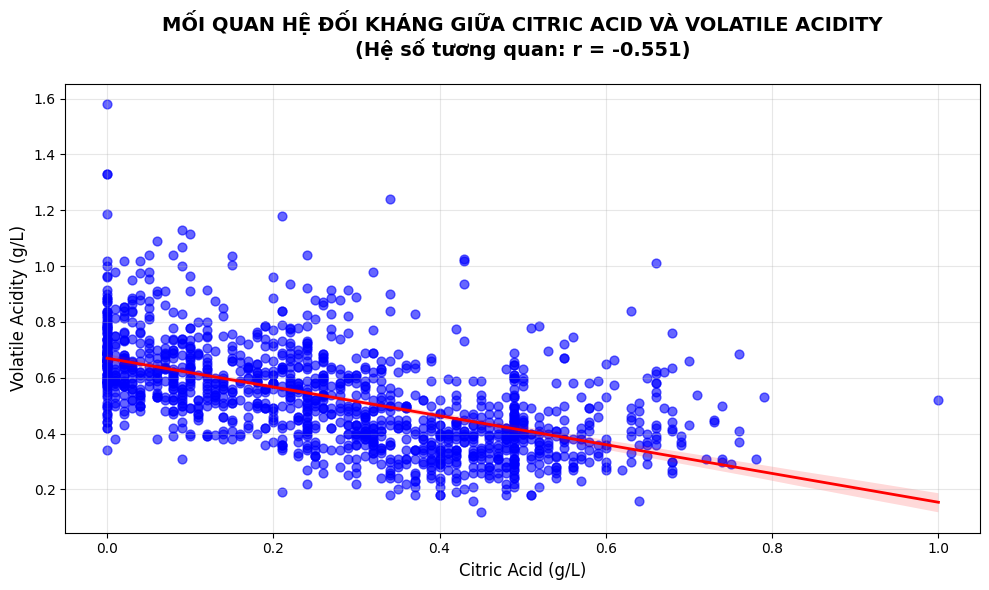

In [45]:
# Tạo scatter plot
plt.figure(figsize=(10, 6))

# Vẽ scatter plot với đường hồi quy
scatter = sns.regplot(data=redwine,
                      x='citric acid',
                      y='volatile acidity',
                      scatter_kws={'alpha':0.6, 'color':'blue', 's':40},
                      line_kws={'color':'red', 'linewidth':2})

plt.xlabel('Citric Acid (g/L)', fontsize=12)
plt.ylabel('Volatile Acidity (g/L)', fontsize=12)

# Sửa lỗi xuống dòng - gộp thành một chuỗi duy nhất
title_text = f'MỐI QUAN HỆ ĐỐI KHÁNG GIỮA CITRIC ACID VÀ VOLATILE ACIDITY\n(Hệ số tương quan: r = {redwine["citric acid"].corr(redwine["volatile acidity"]):.3f})'
plt.title(title_text, fontsize=14, fontweight='bold', pad=20)

# Thêm lưới để dễ đọc
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Nhận xét chung:** Biểu đồ cho thấy mối quan hệ *"một mất, một còn"* giữa hai loại axit: citric acid (axit citric) và volatile acidity (axit dễ bay hơi). Khi citric acid tăng thì volatile acidity giảm, và ngược lại. Hai loại axit này gần như không bao giờ cùng tồn tại ở mức cao trong một chai rượu.

**Điểm khác biệt:** Mặc dù cả hai đều là axit, nhưng ảnh hưởng của chúng lên chất lượng hoàn toàn trái ngược. Citric acid hỗ trợ tích cực cho chất lượng (+0.23), trong khi volatile acidity là yếu tố tiêu cực chính (-0.39). Do đó, một chai rượu chất lượng cao thường có citric acid cao đi kèm với volatile acidity thấp - sự kết hợp này đảm bảo hương vị tươi sáng và hạn chế các tạp chất gây mùi khó chịu.



---

## **5. Kết luận**

**1. Hồ sơ một chai rượu CHẤT LƯỢNG TỐT**
+ Một chai rượu được đánh giá cao thường sở hữu nhóm đặc tính then chốt sau:
    + Nồng độ cồn (alcohol) cao: Đây là yếu tố dự báo tích cực mạnh mẽ và quan trọng nhất.
    + Độ axit dễ bay hơi (volatile acidity) thấp: Đảm bảo rượu không có mùi giấm hoặc mùi khó chịu.
    + Hàm lượng axit citric (citric acid) ở mức trung bình đến cao: Góp phần tạo nên vị tươi sáng, cân bằng và có liên quan đến việc kìm hãm sự phát triển của axit dễ bay hơi.

**2. Dấu hiệu nhận biết một chai rượu CHẤT LƯỢNG KÉM**
+ Ngược lại, một chai rượu kém chất lượng thường mắc phải một hoặc nhiều lỗi sau:
  + Độ axit dễ bay hơi (volatile acidity) quá cao: Đây là "lỗi" phổ biến và nghiêm trọng nhất.
  + Nồng độ cồn (alcohol) thấp: Thiếu đi sự đậm đà và cấu trúc.
  + Hàm lượng muối (chlorides) cao: Có thể khiến rượu có vị mặn hoặc đắng khó chịu. ( ảnh hưởng ít )

**3. Đề xuất Giải pháp cho Nhà sản xuất**
  + Tập trung kiểm soát quy trình lên men: Để hạn chế tối đa sự hình thành axit dễ bay hơi (volatile acidity) - "kẻ phá hoại" số một.
  + Tận dụng mối quan hệ đối kháng: Giữa axit citric và axit dễ bay hơi, bằng cách duy trì một hàm lượng citric acid phù hợp để ổn định chất lượng.
  + Tối ưu hóa để đạt nồng độ cồn (alcohol) phù hợp: Thay vì tập trung vào các chỉ số ít ảnh hưởng như đường dư (residual sugar).

# **Kết thúc**